In [1]:
using CSV
using DrWatson
@quickactivate :Catalyst

┌ Info: Precompiling Catalyst [01e5440a-74e3-4b45-b8b9-c13ddfc5051b]
└ @ Base loading.jl:1260
ERROR: LoadError: LoadError: ArgumentError: Package Crayons [a8cc5b0e-0ffa-5ad4-8c14-923d3ee1735f] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.

Stacktrace:
 [1] _require(::Base.PkgId) at .\loading.jl:998
 [2] require(::Base.PkgId) at .\loading.jl:927
 [3] require(::Module, ::Symbol) at .\loading.jl:922
 [4] include(::Module, ::String) at .\Base.jl:377
 [5] include(::String) at C:\Users\power\.julia\packages\UnicodePlots\ziaTE\src\UnicodePlots.jl:1
 [6] top-level scope at C:\Users\power\.julia\packages\UnicodePlots\ziaTE\src\UnicodePlots.jl:67
 [7] include(::Module, ::String) at .\Base.jl:377
 [8] top-level scope at none:2
 [9] eval at .\boot.jl:331 [inlined]
 [10] eval(::Expr) at .\client.jl:449
 [11] top-level scope at .\none:3
in expression starting at C:\Users\power\.julia\packages\UnicodePlots\ziaTE\src\canvas\heatmapcanva

ErrorException: Failed to precompile Catalyst [01e5440a-74e3-4b45-b8b9-c13ddfc5051b] to C:\Users\power\.julia\compiled\v1.4\Catalyst\J9Gan_Tzr31.ji.

In [4]:
file = CSV.File(datadir("experiment/init_output_data.csv"), delim="\t")
O_12 = Float64[]
O_10 = Float64[]
O_8 = Float64[]
for row in file
    push!(O_12,row.O_12)
    push!(O_10,row.O_10)
    push!(O_8,row.O_8)
end

In [6]:
O_12

501-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [7]:
function interpolate(A::Array{Float64,1})
    D = zeros((length(A)*2)-1)
    D[1] = A[1]
    for i in 2:length(D)
            if(i%2 == 0)
                D[i]= 0.5*(A[convert(Int64,i/2)]+A[convert(Int64,(i/2)+1)]) #for our special case becasue ratio 2/1
            elseif(i%2 == 1)
                D[i] = A[convert(Int64,(i+1)/2)]
            end
    end
return D
end
A = [0.,2.,4.,6.,8.,10.,12.,14.]
M = interpolate(A)

15-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0

In [8]:
int_O_12 = interpolate(O_12)
int_O_10 = interpolate(O_10)
int_O_8 = interpolate(O_8);

In [115]:
using DataFrames
df = DataFrame(inter_12 = int_O_12, inter_10 = int_O_10, inter_8 = int_O_8)

,inter_12,inter_10,inter_8
,Float64,Float64,Float64
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [128]:
CSV.write(datadir("experiment/interpolated_output.csv"),df)

"D:\\git\\advection-diffusion-catalysis\\data\\experiment/interpolated_output.csv"

In [9]:
file = CSV.File(datadir("experiment/SBA15_init_all.csv"), delim="\t")
I_12 = Float64[]
I_10 = Float64[]
I_8 = Float64[]
t = Float64[]
for row in file
    push!(I_12,row.I_12)
    push!(I_10,row.I_10)
    push!(I_8,row.I_8)
    push!(t,row.t_I)
end

In [152]:
df1 = DataFrame(time = t, Input_12 = I_12, Input_10 = I_10, Input_8 = I_8, Output_12 = int_O_12, Output_10 = int_O_10, Output_8 = int_O_8)

,time,Input_12,Input_10,Input_8,Output_12,Output_10,Output_8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
2,1.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
3,2.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
4,3.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
5,4.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
6,5.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
7,6.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
8,7.0,0.00815,0.00783,0.01139,0.0,0.0,0.0
9,8.0,0.00815,0.00783,0.01139,0.0,0.0,0.0


In [154]:
CSV.write(datadir("experiment/SBA15_interp_all.csv"),df1)

"D:\\git\\advection-diffusion-catalysis\\data\\experiment/SBA15_interp_all.csv"

In [155]:
df2 = DataFrame(T = t, I = I_12, O = int_O_12)

,T,I,O
,Float64,Float64,Float64
1,0.0,0.00815,0.0
2,1.0,0.00815,0.0
3,2.0,0.00815,0.0
4,3.0,0.00815,0.0
5,4.0,0.00815,0.0
6,5.0,0.00815,0.0
7,6.0,0.00815,0.0
8,7.0,0.00815,0.0
9,8.0,0.00815,0.0


In [156]:
CSV.write(datadir("experiment/SBA15_interp_12.csv"),df2)

"D:\\git\\advection-diffusion-catalysis\\data\\experiment/SBA15_interp_12.csv"

In [157]:
df3 = DataFrame(T = t, I = I_10, O = int_O_10)

,T,I,O
,Float64,Float64,Float64
1,0.0,0.00783,0.0
2,1.0,0.00783,0.0
3,2.0,0.00783,0.0
4,3.0,0.00783,0.0
5,4.0,0.00783,0.0
6,5.0,0.00783,0.0
7,6.0,0.00783,0.0
8,7.0,0.00783,0.0
9,8.0,0.00783,0.0


In [158]:
CSV.write(datadir("experiment/SBA15_interp_10.csv"),df3)

"D:\\git\\advection-diffusion-catalysis\\data\\experiment/SBA15_interp_10.csv"

In [159]:
df4 = DataFrame(T = t, I = I_8, O = int_O_8)

,T,I,O
,Float64,Float64,Float64
1,0.0,0.01139,0.0
2,1.0,0.01139,0.0
3,2.0,0.01139,0.0
4,3.0,0.01139,0.0
5,4.0,0.01139,0.0
6,5.0,0.01139,0.0
7,6.0,0.01139,0.0
8,7.0,0.01139,0.0
9,8.0,0.01139,0.0


In [ ]:
CSV.write(datadir("experiment/SBA15_interp_8.csv"),df3)

In [20]:
file1 = CSV.File(datadir("experiment/SBA15_interp_8.csv"), delim=",")
o1 = Float64[]
o2 = Float64[]
time = Float64[]
time2 = Float64[]
for row in file1
    push!(time,row.T) 
    push!(o1,row.O) 
end
file2 = CSV.File(datadir("experiment/init_output_data.csv"), delim="\t")
for row in file2
    push!(o2,row.O_8) 
    push!(time2,row.t)
end
time2

501-element Array{Float64,1}:
    0.0
    2.0
    4.0
    6.0
    8.0
   10.0
   12.0
   14.0
   16.0
   18.0
   20.0
   22.0
   24.0
    ⋮
  978.0
  980.0
  982.0
  984.0
  986.0
  988.0
  990.0
  992.0
  994.0
  996.0
  998.0
 1000.0

In [29]:
using Plots

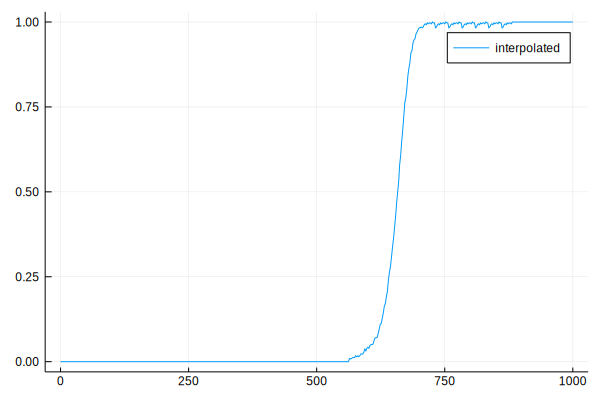

In [30]:
plot(time,o1,label = "interpolated")


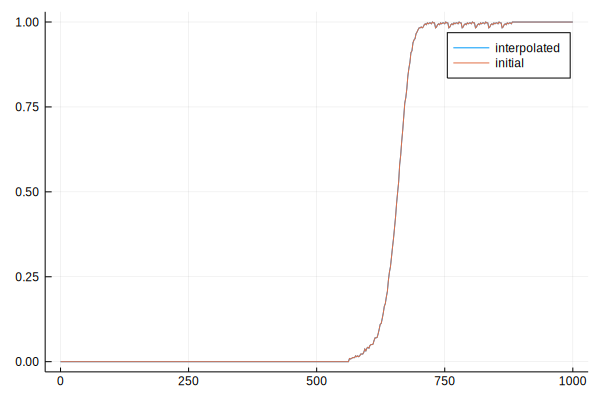

In [31]:
plot!(time2,o2,label = "initial")